In [1]:
%pylab inline
from pydem import *
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


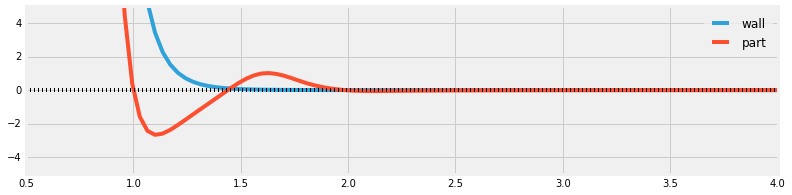

In [2]:
wall = soft_sphere([], [])
part = lennard_jones([1.1, 1.6], [-2.68, 1], scale=1e6, xmin=1, xmax=2, grid_size=8);

P = [
    [wall, wall],
    [wall, part],
    ]

plot_potentials(wall, lambda x: part(x) / 1e6, fs=(12,3))
legend(['wall', 'part']);

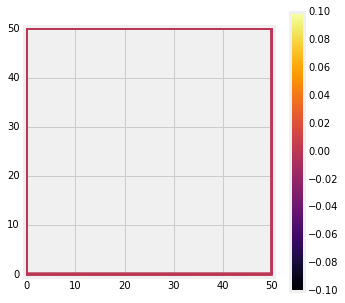

In [3]:
L = 50
H = 50
h = 0.1

coo = make_box(L, H, h)
nw = coo.shape[0]

typ    = zeros(nw, int32)
mass   = ones(nw)
radius = h * ones(nw)

plot_points(coo, typ, fs=(5,5))

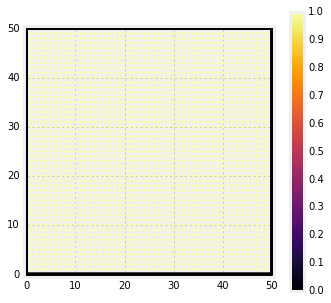

In [4]:
h=1
p = mgrid[h:L-h/2:h, h:H-h/2:h].reshape(2,-1).transpose()
np = p.shape[0]

coo    = append(coo,    p, axis=0).copy()
typ    = append(typ,    ones(np, int32)).copy()
mass   = append(mass,   100 * ones(np)).copy()
radius = append(radius, 0.5 * ones(np)).copy()

plot_points(coo, typ, fs=(5,5))

In [5]:
vel = zeros_like(coo) + [0, -10]
vel[typ==0] = 0
acc = zeros_like(coo)

d = dem(P, coo, mass, radius, typ, zeros((0,2)), device='K40', gamma=0, aux_force=pull_down(1e5))
print(d.device())

Tesla K40c (NVIDIA CUDA)


In [6]:
save = saver('tmp', typ, mass, radius)

time = 0
tau = 1e-4

100%|██████████| 100/100 [01:08<00:00,  1.46it/s]


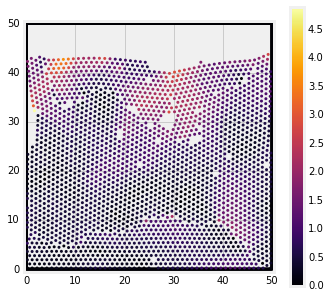

In [7]:
for i in tqdm(range(100), leave=True):
    time = d.advance(coo, vel, acc, 500, tau, time)
    save(time, coo, vel, acc)

plot_points(coo, norm(vel, axis=1), fs=(5,5))

In [8]:
make_video('tmp', figsize=(12,8))

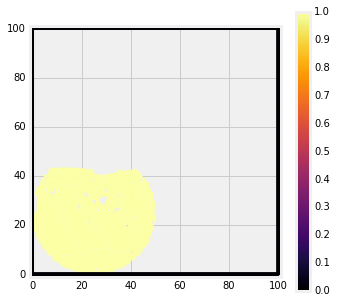

In [9]:
I = (typ > 0) & (norm(coo - [25,25], axis=1) < 25)

coo = coo[I,:]
typ = typ[I]
mass = mass[I]
radius = radius[I]

p = make_box(100, 100, 0.1)
np = p.shape[0]

coo    = append(coo,    p, axis=0).copy()
typ    = append(typ,    zeros(np, int32)).copy()
mass   = append(mass,   ones(np)).copy()
radius = append(radius, 0.1 * ones(np)).copy()

plot_points(coo, typ, fs=(5,5))

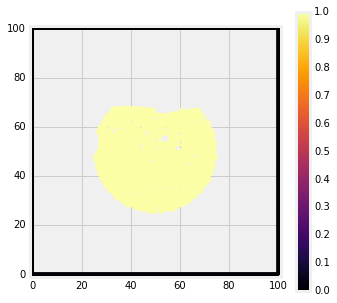

In [10]:
coo[typ==1] += [25,25]
plot_points(coo, typ, fs=(5,5))

In [11]:
vel = zeros_like(coo)
acc = zeros_like(coo)
vel[typ==1,1] -= 30 

In [12]:
del save
save = saver('tmp', typ, mass, radius)
d = dem(P, coo, mass, radius, typ, zeros((0,2)), device='K40', gamma=0)
print(d.device())

time = 0.0

Tesla K40c (NVIDIA CUDA)


100%|██████████| 200/200 [01:53<00:00,  1.69it/s]


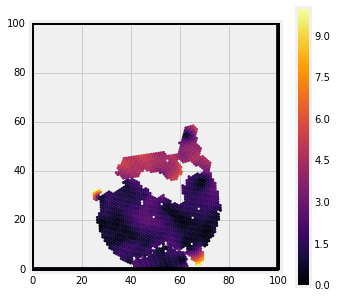

In [13]:
for i in tqdm(range(200), leave=True):
    time = d.advance(coo, vel, acc, 500, tau, time)
    save(time, coo, vel, acc)

plot_points(coo, norm(vel, axis=1), fs=(5,5))

In [14]:
make_video('tmp', figsize=(12,8), maxframes=100)